In [2]:
import glob
import random
import base64
import pandas as pd

from PIL import Image
from io import BytesIO
from IPython.display import Image, HTML, display


In [10]:
df = pd.DataFrame({
    'Image': ['test/radiology/images/PMC29044_cc-4-4-245-1.jpg','test/radiology/images/PMC64494_1471-2393-1-8-3.jpg','test/radiology/images/PMC139990_1471-2342-2-3-3.jpg'],
    'Caption': ["Angio-MR, axial cut: disappearance of vascular enhancement ...","Antero-posterior radiographic view, showing missing ribs, absent lumbosacral vertebrae, hypoplastic pelvis and frog-like position of the lower extremities.","Dry peritonitis: CT scan showing diffuse mesenteric strands, mesenteric nodes and omental thickening."],
    'Label':["test","test","test"],
    'Radiology/Non-Radiology':["Radiology","Radiology","Non-Radiology"]
})


def path_to_image_html(path):
    return f'<img src="{path}" width="100" >' 

df['Image_HTML'] = df['Image'].apply(path_to_image_html)

HTML(df[['Image_HTML', 'Caption','Label',"Radiology/Non-Radiology"]].to_html(escape=False))


,Image_HTML,Caption,Label,Radiology/Non-Radiology
0,,"Angio-MR, axial cut: disappearance of vascular enhancement ...",test,Radiology
1,,"Antero-posterior radiographic view, showing missing ribs, absent lumbosacral vertebrae, hypoplastic pelvis and frog-like position of the lower extremities.",test,Radiology
2,,"Dry peritonitis: CT scan showing diffuse mesenteric strands, mesenteric nodes and omental thickening.",test,Non-Radiology


Caption Length Stats:
count      3.000000
mean     106.000000
std       46.701178
min       62.000000
25%       81.500000
50%      101.000000
75%      128.000000
max      155.000000
Name: Caption_Length, dtype: float64

Radiology/Non-Radiology Distribution:
Radiology/Non-Radiology
Radiology        2
Non-Radiology    1
Name: count, dtype: int64


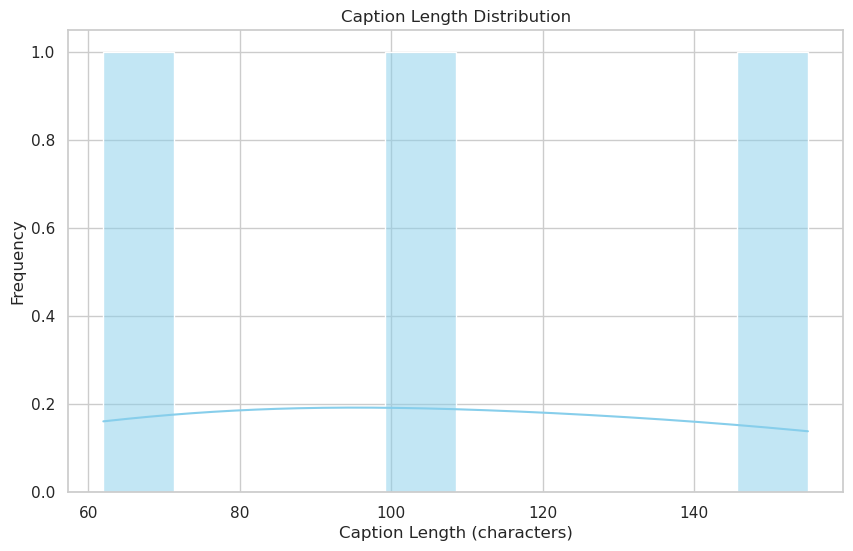

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML

df = pd.DataFrame({
    'Image': [
        'test/radiology/images/PMC29044_cc-4-4-245-1.jpg',
        'test/radiology/images/PMC64494_1471-2393-1-8-3.jpg',
        'test/radiology/images/PMC139990_1471-2342-2-3-3.jpg'
    ],
    'Caption': [
        "Angio-MR, axial cut: disappearance of vascular enhancement ...",
        "Antero-posterior radiographic view, showing missing ribs, absent lumbosacral vertebrae, hypoplastic pelvis and frog-like position of the lower extremities.",
        "Dry peritonitis: CT scan showing diffuse mesenteric strands, mesenteric nodes and omental thickening."
    ],
    'Label': ["test", "test", "test"],
    'Radiology/Non-Radiology': ["Radiology", "Radiology", "Non-Radiology"]
})

def path_to_image_html(path):
    return f'<img src="{path}" width="100" >' 

df['Image_HTML'] = df['Image'].apply(path_to_image_html)

df['Caption_Length'] = df['Caption'].apply(len)

display_html = HTML(df[['Image_HTML', 'Caption', 'Label', 'Radiology/Non-Radiology']].to_html(escape=False))
display_html

print("Caption Length Stats:")
print(df['Caption_Length'].describe())

print("\nRadiology/Non-Radiology Distribution:")
print(df['Radiology/Non-Radiology'].value_counts())


sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Caption_Length', kde=True, bins=10, color="skyblue")
plt.title("Caption Length Distribution")
plt.xlabel("Caption Length (characters)")
plt.ylabel("Frequency")
plt.show()


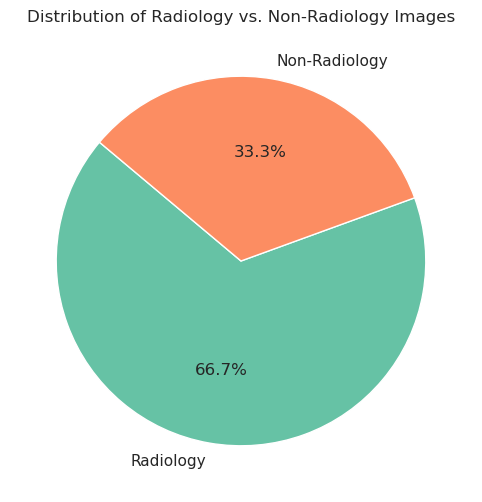

In [11]:
category_counts = df['Radiology/Non-Radiology'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140, colors=["#66c2a5", "#fc8d62"])
plt.title("Distribution of Radiology vs. Non-Radiology Images")
plt.show()

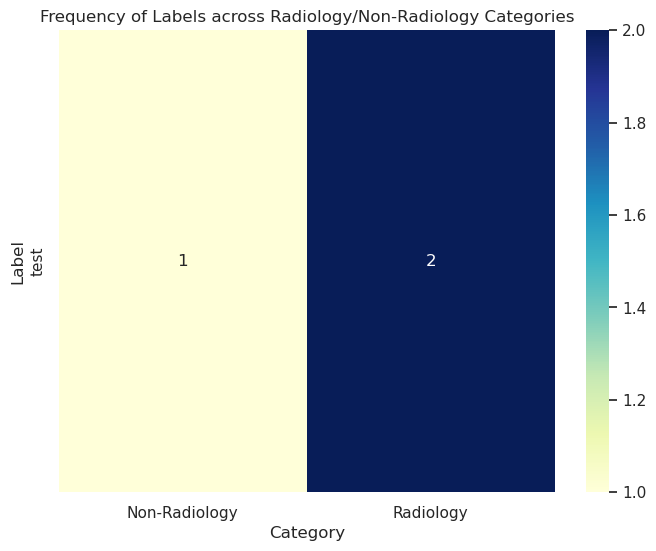

In [12]:

label_category_counts = pd.crosstab(df['Label'], df['Radiology/Non-Radiology'])

plt.figure(figsize=(8, 6))
sns.heatmap(label_category_counts, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Frequency of Labels across Radiology/Non-Radiology Categories")
plt.ylabel("Label")
plt.xlabel("Category")
plt.show()


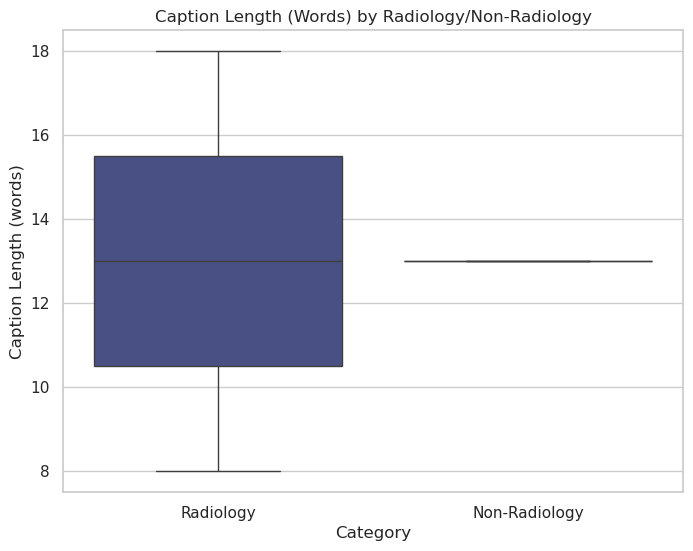

In [13]:

df['Caption_Length'] = df['Caption'].apply(lambda x: len(x.split()))

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Radiology/Non-Radiology', y='Caption_Length', hue='Radiology/Non-Radiology', palette="mako", dodge=False)
plt.title("Caption Length (Words) by Radiology/Non-Radiology")
plt.xlabel("Category")
plt.ylabel("Caption Length (words)")
plt.show()
